In [1]:
#This notebook is to test the pre-trained model with the test set.
import torch
from GCN_regression import *
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from scipy import stats
from sklearn import metrics


import numpy as np

In [2]:
"""
def test(model, test_loader, loss_func):
    # model.eval()
    
    X_test, edge_index_test, edge_weight_test, batch_vec_test, y_test = batch.X, batch.edge_index, batch.edge_attr, batch.batch, batch.y
    
    X_test, edge_index_test, edge_weight_test, batch_vec_test = X_test.to(device), edge_index_test.to(device), edge_weight_test.to(device), batch_vec_test.to(device) 
    y_test = Variable(torch.as_tensor(y, dtype=torch.float32)).to(device)
    
    prediction_test = model(X_test, edge_index_test, edge_weight_test, batch_vec_test)
    
    loss_test = loss_func(prediction, y_test)
    
    print(y_test, prediction)
    sp_cor = stats.spearmanr(prediction.data.cpu().numpy(), y_test.data.cpu().numpy())[0]
    rsq = metrics.r2_score(y_test.data.cpu().numpy(), prediction.data.cpu().numpy())
    print("test set results:",
          "loss= ", loss_test.data.cpu().numpy(),
          "spearman=", sp_cor,
          "rsq", rsq)
    return sp_cor, rsq
    """

'\ndef test(model, test_loader, loss_func):\n    # model.eval()\n    \n    X_test, edge_index_test, edge_weight_test, batch_vec_test, y_test = batch.X, batch.edge_index, batch.edge_attr, batch.batch, batch.y\n    \n    X_test, edge_index_test, edge_weight_test, batch_vec_test = X_test.to(device), edge_index_test.to(device), edge_weight_test.to(device), batch_vec_test.to(device) \n    y_test = Variable(torch.as_tensor(y, dtype=torch.float32)).to(device)\n    \n    prediction_test = model(X_test, edge_index_test, edge_weight_test, batch_vec_test)\n    \n    loss_test = loss_func(prediction, y_test)\n    \n    print(y_test, prediction)\n    sp_cor = stats.spearmanr(prediction.data.cpu().numpy(), y_test.data.cpu().numpy())[0]\n    rsq = metrics.r2_score(y_test.data.cpu().numpy(), prediction.data.cpu().numpy())\n    print("test set results:",\n          "loss= ", loss_test.data.cpu().numpy(),\n          "spearman=", sp_cor,\n          "rsq", rsq)\n    return sp_cor, rsq\n    '

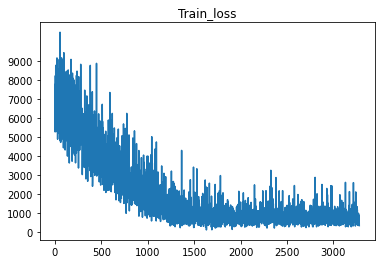

In [20]:
#check the loss functions.

train_loss = np.load("./outputs/gcn_net_trained_11_16batched_MSELoss_train_loss.npy", allow_pickle=True)
val_loss = np.load("./outputs/gcn_net_trained_11_16batched_MSELoss_val_loss.npy", allow_pickle=True)

plt.plot(range(0,len(train_loss)), train_loss)
plt.title("Train_loss")
plt.yticks(np.arange(0, 10000, 1000.0))
plt.show()



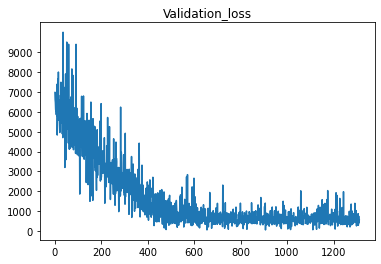

In [21]:

plt.plot(range(0,len(val_loss)), val_loss)
plt.title("Validation_loss")
plt.yticks(np.arange(0, 10000, 1000.0))
plt.show()


In [3]:
torch.manual_seed = 1
best_epoch_num = 0
best_loss_valid = 1e10
earlystopping = True
patient = 5
PATH = './models/gcn_net_trained_11_16batched_MSELoss.pt.final'


batch_size = 16
max_epochs = 50
DATA_PATH = "./NLLZ_7_PROD_1_frames/"


dataset_size = len(My_dataset())
perm = torch.randperm(dataset_size).numpy()
partition = {}
partition["train"] = perm[:int(dataset_size*8/10)]
partition["validation"] = perm[int(dataset_size*8/10):int(dataset_size*9/10)]
partition["test"] = perm[int(dataset_size*9/10):]


In [5]:
if __name__ == "__main__":
    
    #earlystopping, best_loss_valid, best_epoch_num, patient = args.earlystopping, args.best_loss_valid, args.best_epoch_num, args.patient
    
    
    #fix the random seed.
    np.random.seed(1)
    torch.random.manual_seed(1)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    ############################################################################
    #data loader initalization
    #DATA_PATH = './data/'
    dataset_size = 1000
    perm = torch.randperm(dataset_size).numpy()
    partition = {}
    partition["train"] = perm[:int(dataset_size*8/10)]
    partition["validation"] = perm[int(dataset_size*8/10):int(dataset_size*9/10)]
    partition["test"] = perm[int(dataset_size*9/10):]

    train_loader = DataLoader(torch.utils.data.Subset(My_dataset(), partition["train"]), 
                              batch_size=16, 
                              #sampler=train_sampler,
                              shuffle=True, 
                              num_workers=8)

    validation_loader = DataLoader(torch.utils.data.Subset(My_dataset(), partition["validation"]), 
                              batch_size=16, 
                              #sampler=validation_sampler,
                              shuffle=True, 
                              num_workers=8)

    test_loader = DataLoader(torch.utils.data.Subset(My_dataset(), partition["test"]), 
                              batch_size=16, 
                              #sampler=test_sampler,
                              shuffle=True, 
                              num_workers=8)
#training_set = My_dataset(partition["train"], list_pt_datas)
#training_generator = torch.utils.data.DataLoader(training_set, **params) # here we can't use ordinary torch dataloader, need to define one of our own.
#validation_set = My_dataset(partition['validation'], list_pt_datas)
#validation_generator = torch.utils.data.DataLoader(validation_set, **params)
    device = torch.device('cpu')
    model = GCN_regression_Net(n_features = 6, 
                           nhid1 = 32, 
                           nhid2 = 64, 
                           nhid3 = 128,  
                           batch_size = 16).to(device)

#data = data_list[data_num].to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1E-6, weight_decay=5e-4)

    loss_func = torch.nn.MSELoss()

    hist_train_loss = []
    hist_val_loss = []

    model.load_state_dict(torch.load(PATH))


In [6]:
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [7]:
with torch.no_grad():
    for i, batch in enumerate(test_loader):
        print("processing batch number: %d" %i)
        batch_vec, X, edge_index, edge_weight, y = batch.batch, batch.X, batch.edge_index, batch.edge_attr, batch.y
        batch_vec, X, edge_index, edge_weight = batch_vec.to(device), Variable(torch.as_tensor(X, dtype=torch.float32)).to(device), edge_index.to(device), edge_weight.to(device)
        
        #print(edge_index.shape)
        #print(edge_weight.shape)
        
        y = Variable(torch.as_tensor(y, dtype=torch.float32)).to(device)
            
        #optimizer.zero_grad()
            
        prediction_test = model(X, edge_index, edge_weight, batch_vec) #forward 
        loss = loss_func(prediction_test, y)/batch_size
        
        sp_cor = stats.spearmanr(prediction_test.detach().numpy(), y.detach().numpy())[0]
        pe_cor = stats.pearsonr(prediction_test.detach().numpy(), y.detach().numpy())[0]
        rsq = metrics.r2_score(y.detach().numpy(), prediction_test.detach())
        
        print("results:",
          "loss:", loss.detach().numpy(),
          "spearman:", sp_cor,
          "person:", pe_cor,
          "rsq:", rsq)

processing batch number: 0
results: loss: 958.9568 spearman: 0.2604857217345777 person: 0.27026885493741937 rsq: -0.009744806460158406
processing batch number: 1
results: loss: 763.8323 spearman: -0.1621227248504592 person: -0.17351735158226683 rsq: -0.01494923888891897
processing batch number: 2
results: loss: 1250.7288 spearman: 0.12352941176470587 person: 0.03291240132845499 rsq: -0.13908501178027577
processing batch number: 3
results: loss: 700.67084 spearman: -0.2411764705882353 person: -0.2130793433683713 rsq: -0.07946174830593167
processing batch number: 4
results: loss: 773.95215 spearman: 0.1264705882352941 person: 0.1907074177826485 rsq: 0.00260370416600042
processing batch number: 5
results: loss: 1040.8029 spearman: 0.36764705882352944 person: 0.2628246837323915 rsq: 0.02122842065092667
processing batch number: 6
results: loss: 1001.4636 spearman: 0.39999999999999997 person: 0.08211002577600834 rsq: -0.03726968405532394


In [8]:
with torch.no_grad():
    for i, batch in enumerate(train_loader):
        print("processing batch number: %d" %i)
        batch_vec, X, edge_index, edge_weight, y = batch.batch, batch.X, batch.edge_index, batch.edge_attr, batch.y
        batch_vec, X, edge_index, edge_weight = batch_vec.to(device), Variable(torch.as_tensor(X, dtype=torch.float32)).to(device), edge_index.to(device), edge_weight.to(device)
        
        #print(edge_index.shape)
        #print(edge_weight.shape)
        
        y = Variable(torch.as_tensor(y, dtype=torch.float32)).to(device)
            
        #optimizer.zero_grad()
            
        prediction_test = model(X, edge_index, edge_weight, batch_vec) #forward 
        loss = loss_func(prediction_test, y)/batch_size
        
        sp_cor = stats.spearmanr(prediction_test.detach().numpy(), y.detach().numpy())[0]
        pe_cor = stats.pearsonr(prediction_test.detach().numpy(), y.detach().numpy())[0]
        rsq = metrics.r2_score(y.detach().numpy(), prediction_test.detach())
        
        print("results:",
          "loss:", loss.detach().numpy(),
          "spearman:", sp_cor,
          "person:", pe_cor,
          "rsq:", rsq)

processing batch number: 0
results: loss: 1698.7384 spearman: -0.1103753058197363 person: -0.19041197669900278 rsq: -1.2837300616062293
processing batch number: 1
results: loss: 1211.1862 spearman: 0.6294117647058822 person: 0.4147832516810968 rsq: -0.4556569428349573
processing batch number: 2
results: loss: 1368.2332 spearman: 0.4676470588235294 person: 0.4756828905677848 rsq: -0.7101159592178039
processing batch number: 3
results: loss: 623.13257 spearman: 0.440029552534682 person: 0.4123981819263672 rsq: -0.729648705680704
processing batch number: 4
results: loss: 1545.3793 spearman: -0.08535690316726273 person: 0.09220954660480493 rsq: -3.429061812263761
processing batch number: 5
results: loss: 1837.2004 spearman: 0.07947022019021013 person: -0.014854318605674356 rsq: -0.8055625242895721
processing batch number: 6
results: loss: 1806.1105 spearman: 0.2325239775935778 person: 0.15112899555370995 rsq: -1.0970049199091005
processing batch number: 7
results: loss: 1459.9 spearman: 0.